In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [ ]:
train_df.info()
#1460 x 81
#Last column contains the sale price to be predicted in test set

In [ ]:
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [ ]:
#Find out which paramters appear to have an appreciable linear relationship with SalePrice
print("List of parameters that have a good linear model fit to Sale Price")
for i in range(len(corrmat["SalePrice"])-1):
    #Likely to be a linear relationship
    if((corrmat["SalePrice"][i] > 0.5 or corrmat["SalePrice"][i] < -0.5)):
        print(corrmat.columns[i], corrmat["SalePrice"][i])

In [ ]:
#We are going to want data parameters to have a significant amount of data for proper training
#Thus, Alley, PoolQC, Fence, MiscFeature all should be removed for low values
#FireplaceQu also only has half total data, possible need for removal as well
##ID column merely shows the row number of each sample
#Has no relationship with sale price so can also remove
train_df = train_df.drop(["Id","Alley","PoolQC","Fence","MiscFeature"],axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

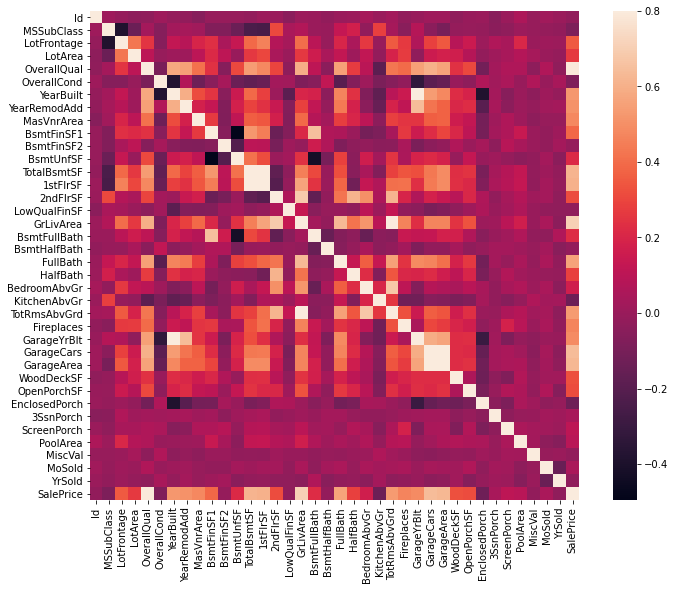

In [1]:
#NA values in number valued columns can be replaced by 0 to retain only numbers
# for i in train_df.columns:
#     if (train_df[i].dtype == 'int64' or train_df[i].dtype == 'float64'):
#         train_df[i] = train_df[i].fillna(train_df[i].mode()[0])